In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import tensorflow as tf

### Dataset
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http:/ /archive.ics.uci.edu/ml]. Irvine, CA: University, of California,
School of Information and Computer Science.
Donated by: P. SavickyInstitute of Computer Science, AS of CR Czech Republic savicky '@' cs.cas.cz

In [2]:
pd.read_csv('passes.csv')

game_id;passing_quote;winner
0                       11;72;No
1                      11;91;Yes
2                      12;82;Yes
3                       12;86;No
4                      13;82;Yes
..                           ...
301                   177;81;Yes
302                    178;73;No
303                    178;74;No
304                   179;74;Yes
305                    179;89;No

[306 rows x 1 columns]

In [3]:
df = pd.read_csv('magic04.csv')
df

28.7967   16.0021  2.6449  0.3918  0.1982   27.7004    22.011  \
0       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
1      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
2       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
3       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
4       51.6240   21.1502  2.9085  0.2420  0.1340   50.8761   43.1887   
...         ...       ...     ...     ...     ...       ...       ...   
19014   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19015   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19016   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19017  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19018  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       -8.2027   40.092   81.8828  g  
0      -9.9574   6.3609  205.2610  g  
1     -45.2160  76.9600  256.7880  g  
2      -7.1513  10.4490  116.7370  g  
3      21.8393   4.6480  356.4620  g  
4       9.8145   3.6130  238.0980  g  
...        ...      ...       ... ..  
19014   2.8766   2.4229  106.8258  h  
19015  -2.9632  86.7975  247.4560  h  
19016  -9.4662  30.2987  256.5166  h  
19017 -63.8389  84.6874  408.3166  h  
19018  31.4755  52.7310  272.3174  h  

[19019 rows x 11 columns]

In [4]:
cols = ["fLength",
 "fWidth",  
 "fSize",   
"fConc", 
 "fConc1",   
  "fAsym",    
 "fM3Long",  
 "fM3Trans", 
 "fAlpha",   
 "fDist",   
  "class"   
]
df=names=pd.read_csv('magic04.csv', names= cols)
df

fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist class  
0       -8.2027  40.0920   81.8828     g  
1       -9.9574   6.3609  205.2610     g  
2      -45.2160  76.9600  256.7880     g  
3       -7.1513  10.4490  116.7370     g  
4       21.8393   4.6480  356.4620     g  
...         ...      ...       ...   ...  
19015    2.8766   2.4229  106.8258     h  
19016   -2.9632  86.7975  247.4560     h  
19017   -9.4662  30.2987  256.5166     h  
19018  -63.8389  84.6874  408.3166     h  
19019   31.4755  52.7310  272.3174     h  

[19020 rows x 11 columns]

In [5]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [6]:
df['class'] = (df['class']=='g').astype(int)

In [7]:
 df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

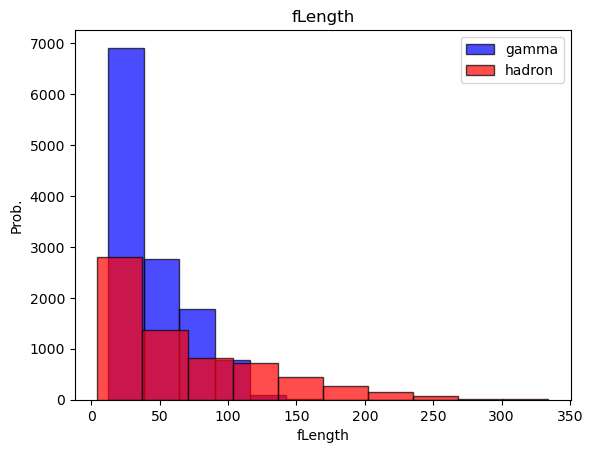

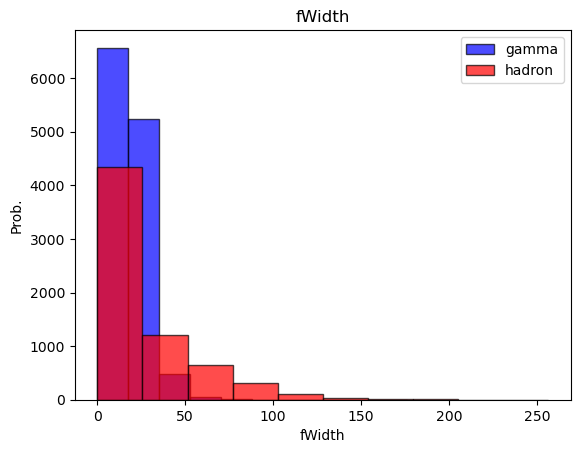

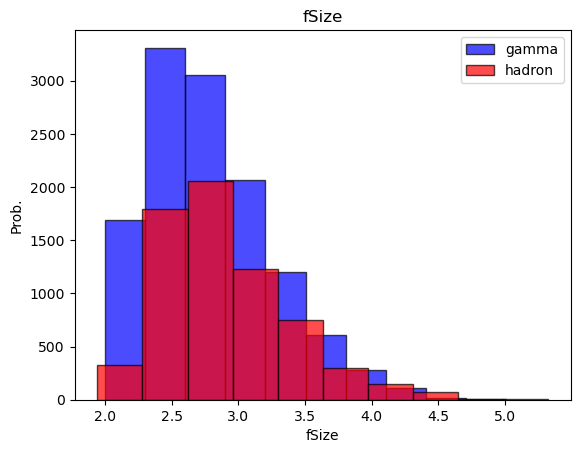

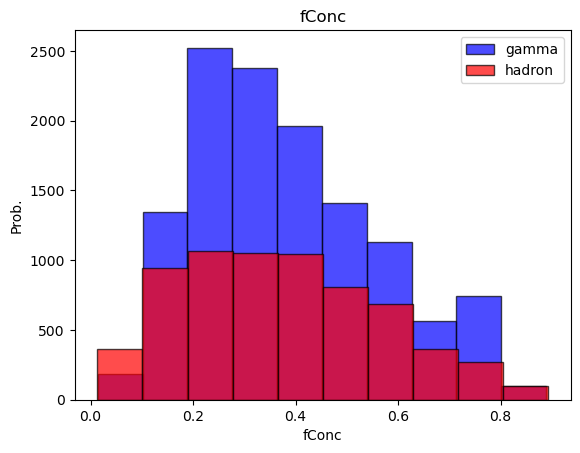

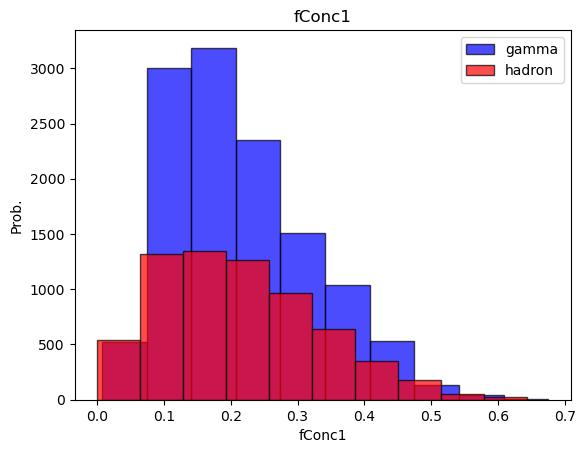

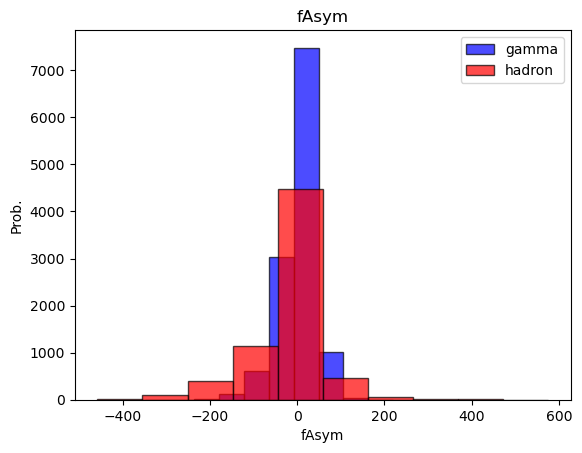

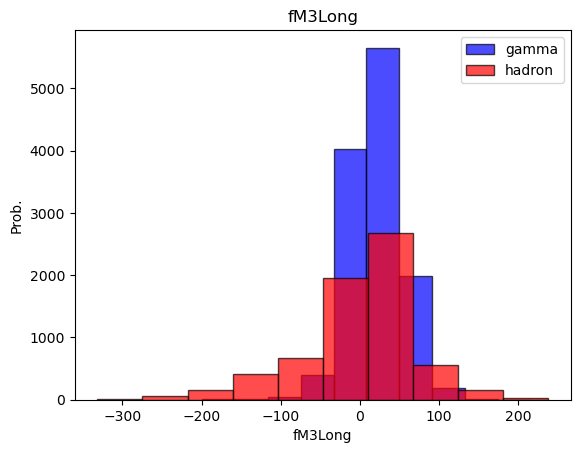

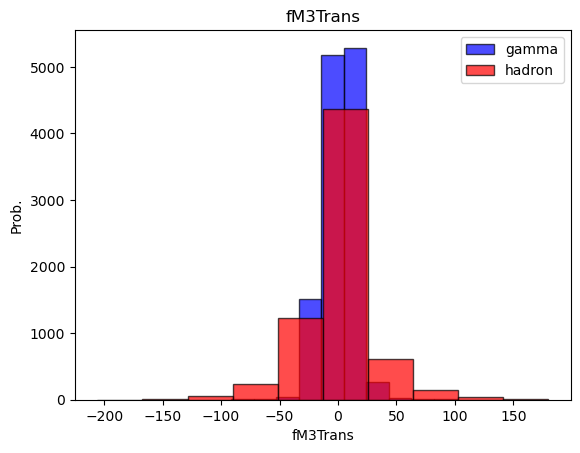

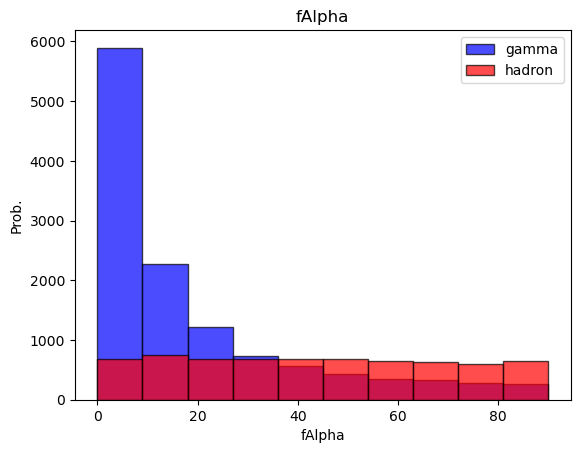

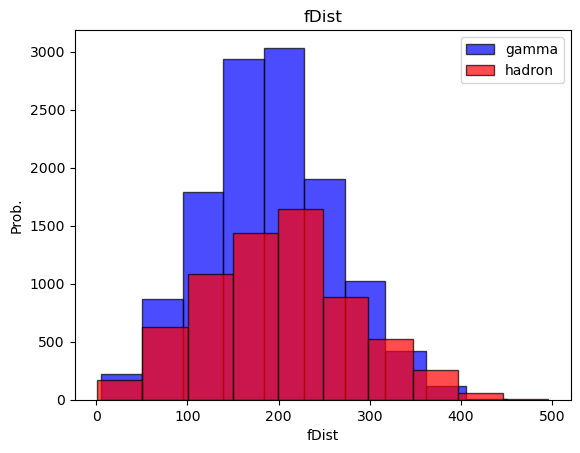

In [8]:
for label in cols[:-1]:
    plt.hist(df[df['class']==1][label], color= 'blue', label='gamma', alpha=0.7, edgecolor= 'black') 
    plt.hist(df[df['class']==0][label], color= 'red', label='hadron', alpha=0.7, edgecolor= 'black')
    plt.title(label)
    plt.ylabel('Prob.')
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Train, Validation and Test Dataset: 

In [9]:
shuffled_df = df.sample(frac=1).reset_index(drop=True)

train_end = int(0.6 * len(shuffled_df))
valid_end = int(0.8 * len(shuffled_df))

train = shuffled_df.iloc[:train_end]
valid = shuffled_df.iloc[train_end:valid_end]
test = shuffled_df.iloc[valid_end:]


In [10]:
def scale_dataset(dataframe, oversample=False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler= StandardScaler()
    x= scaler.fit_transform(x)

    if oversample:
        ros= RandomOverSampler()
        x,y= ros.fit_resample(x,y)

    data= np.hstack((x, np.reshape(y, (len(y), 1))))
    return data, x, y

In [11]:
print(len(train[train['class']==1]))
print(len(train[train['class']==0]))

7397
4015


In [12]:
train, x_train, y_train= scale_dataset(train, oversample=True)

In [13]:
len(y_train)

14794

In [14]:
print(sum(y_train==1))
print(sum(y_train==0))

7397
7397


In [15]:
shuffled_df = df.sample(frac=1).reset_index(drop=True)

# DataFrame'i bölelim
train_end = int(0.6 * len(shuffled_df))
valid_end = int(0.8 * len(shuffled_df))

train = shuffled_df.iloc[:train_end]
valid = shuffled_df.iloc[train_end:valid_end]
test = shuffled_df.iloc[valid_end:]


In [16]:
train, x_train, y_train= scale_dataset(train, oversample=True)
valid, x_valid, y_valid= scale_dataset(valid, oversample=False)
test, x_test, y_test= scale_dataset(test, oversample=False)

# kNN

In [17]:
knn_model= KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [18]:
y_pred= knn_model.predict(x_test)

In [19]:
y_pred

array([0, 1, 0, ..., 0, 1, 0])

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74      1319
           1       0.86      0.86      0.86      2485

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



# Naive Bayes:

In [21]:
nb_model= GaussianNB()
nb_model= nb_model.fit(x_test, y_pred)

In [22]:
y_pred= nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.42      0.53      1319
           1       0.75      0.91      0.82      2485

    accuracy                           0.74      3804
   macro avg       0.73      0.66      0.67      3804
weighted avg       0.73      0.74      0.72      3804



# Logistic Regression:

In [23]:
lg_model= LogisticRegression()
lg_model= lg_model.fit(x_train, y_train)

In [24]:
y_pred= lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1319
           1       0.85      0.83      0.84      2485

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# Support Vector Machines:

In [25]:
svm_model= SVC()
svm_model= svm_model.fit(x_train, y_train)

In [26]:
y_pred= svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1319
           1       0.89      0.89      0.89      2485

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Network 

In [27]:
#import tf_keras
#from tf_keras import layers
#import tensorflow_model_optimization as tfmot

In [28]:
#from keras.models import Sequential
#from keras.layers import Dense

#model = Sequential([
#input(shape=(10,)),
#    Dense(32, activation='relu' ), # İlk katmanda input_shape tanımlanmış
#    Dense(32, activation='relu'),
#    Dense(1, activation='sigmoid')
#])

#nn_model = Sequential()
 #   nn_model.add(Dense(32, activation='relu', input_shape=(10,))),  
  #  nn_model.add(Dense(32, activation='relu')),
   # nn_model.add(Dense(1, activation='sigmoid'))



#nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy',
 #               metrics=['accuracy'])

In [ ]:
#from tensorflow.keras.layers import Dense, Input
#i#nputs = Input(shape=(10,))
#n#n_model= tf.keras.Sequential([
  #  tf.keras.layers.Dense(32, activation='relu', (inputs)),
   # tf.keras.layers.Dense(32, activation='relu'),
   # tf.keras.layers.Dense(1, activation='sigmoid'),
#]) #     
#
#nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy',
            #    metrics=['accuracy'])

In [44]:
def plot_loss(history):
    plt.figure(figsize=(9, 5))
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Binaty crossentropy')
    plt.legend()
    plt.show()
    plt.figure(figsize=(9, 5))
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label= 'accuracy')
    plt.plot(history.history['val_accuracy'], label= 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Binary crossentopy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [45]:
nn_model= tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid',)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy',
                metrics=['accuracy'])
history= nn_model.fit(
    x_train, y_train, epochs=100, batch_size=32, validation_split=0.2
)

Epoch 1/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 584us/step - accuracy: 0.7323 - loss: 0.5328 - val_accuracy: 0.6693 - val_loss: 0.6045
Epoch 2/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.8372 - loss: 0.3771 - val_accuracy: 0.7528 - val_loss: 0.5139
Epoch 3/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - accuracy: 0.8500 - loss: 0.3577 - val_accuracy: 0.7849 - val_loss: 0.4477
Epoch 4/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.8559 - loss: 0.3460 - val_accuracy: 0.7771 - val_loss: 0.4734
Epoch 5/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.8576 - loss: 0.3387 - val_accuracy: 0.7930 - val_loss: 0.4349
Epoch 6/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.8589 - loss: 0.3320 - val_accuracy: 0.7372 - val_loss: 0.5576
Epoch 7/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.8635 - loss: 0.3230 - val_accuracy: 0.7700 - val_loss: 0.4727
Epoch 8/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.8626 - loss: 0

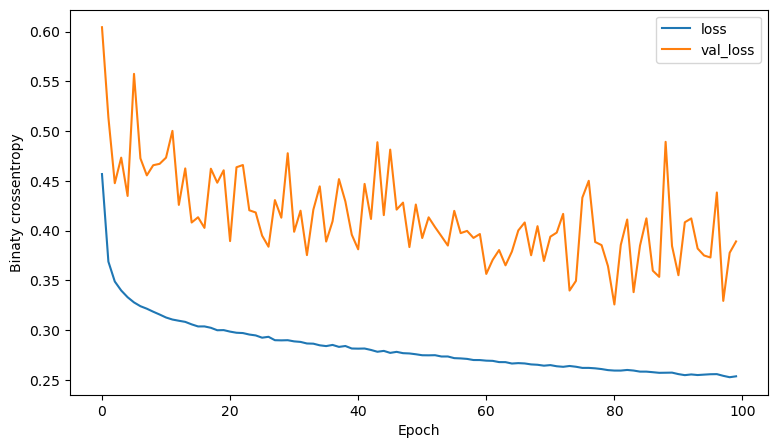

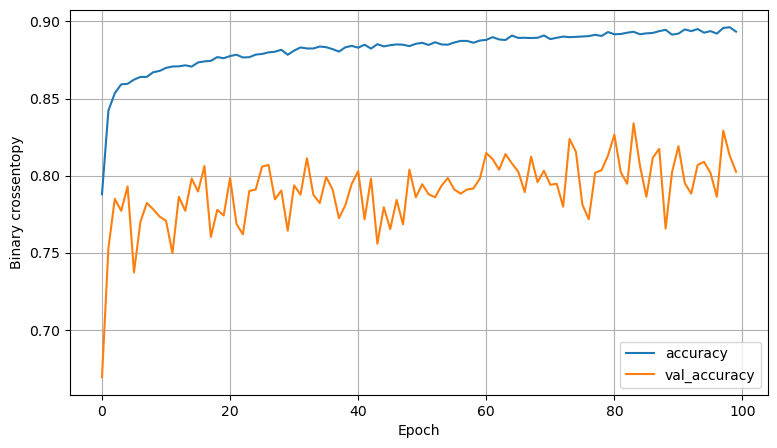

In [46]:
plot_loss(history)
plot_accuracy(history)

In [47]:
def plot_history(history):
    fig, (ax1, ax2)= plt.subplots(1, 2, figsize=(10, 6))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binaty crossentropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label= 'accuracy')
    ax2.plot(history.history['val_accuracy'], label= 'val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)
    plt.show()

In [48]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    
    nn_model= tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid',)
    ])
    
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy',
                metrics=['accuracy'])
    history= nn_model.fit(
        x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose= 0
    )
    return nn_model, history

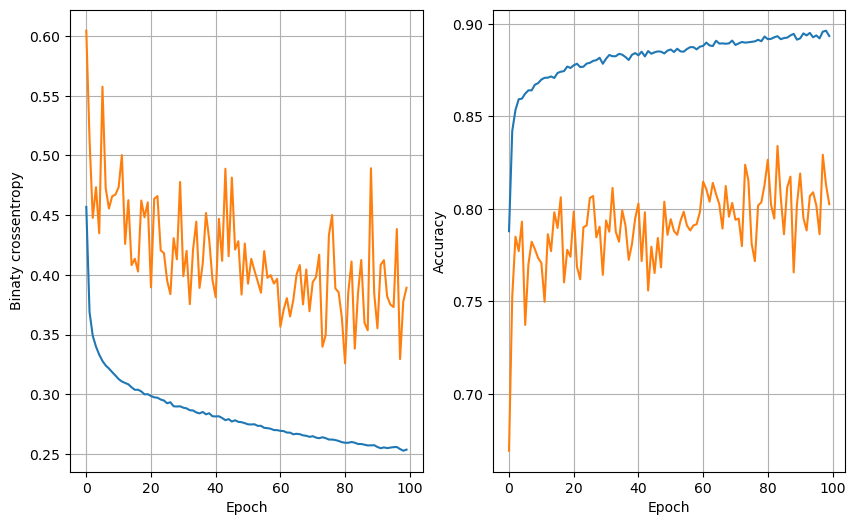

In [49]:
plot_history(history)

16 nodes, dropout 0, lr 0.01, batch size 32


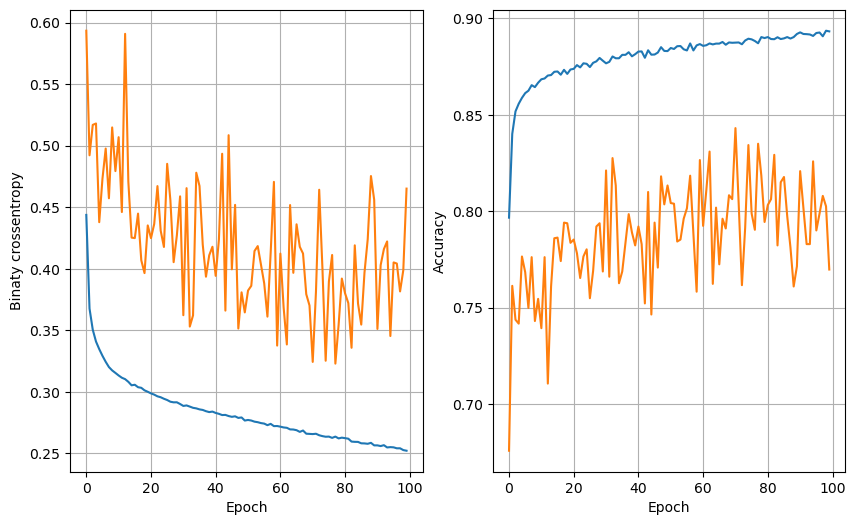

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.8613 - loss: 0.3582
16 nodes, dropout 0, lr 0.01, batch size 64


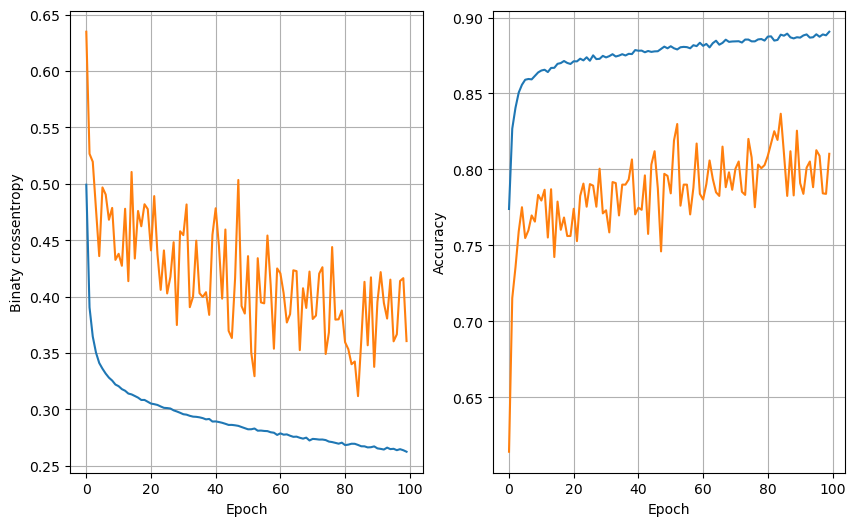

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - accuracy: 0.8508 - loss: 0.3546
16 nodes, dropout 0, lr 0.01, batch size 128


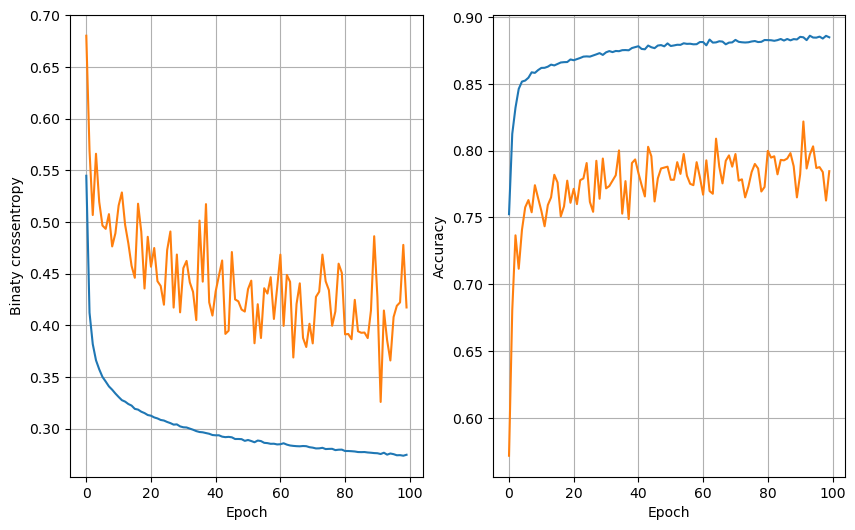

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.8559 - loss: 0.3405
16 nodes, dropout 0, lr 0.005, batch size 32


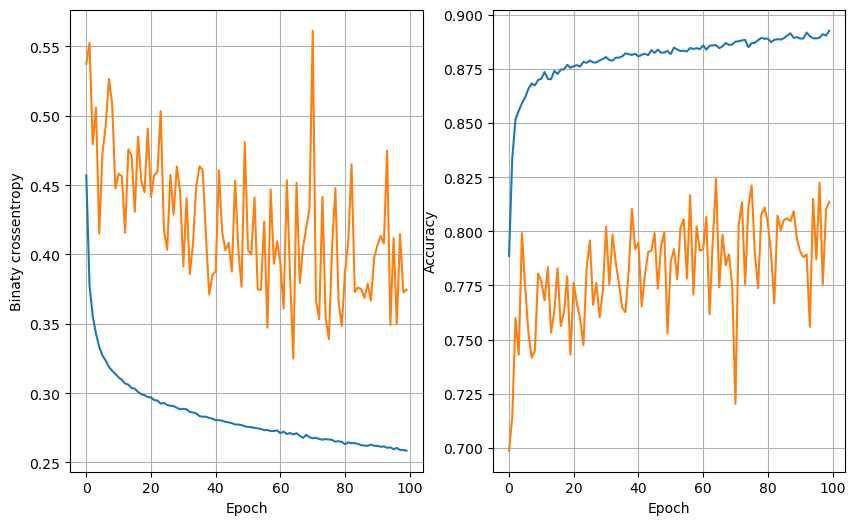

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - accuracy: 0.8497 - loss: 0.3571
16 nodes, dropout 0, lr 0.005, batch size 64


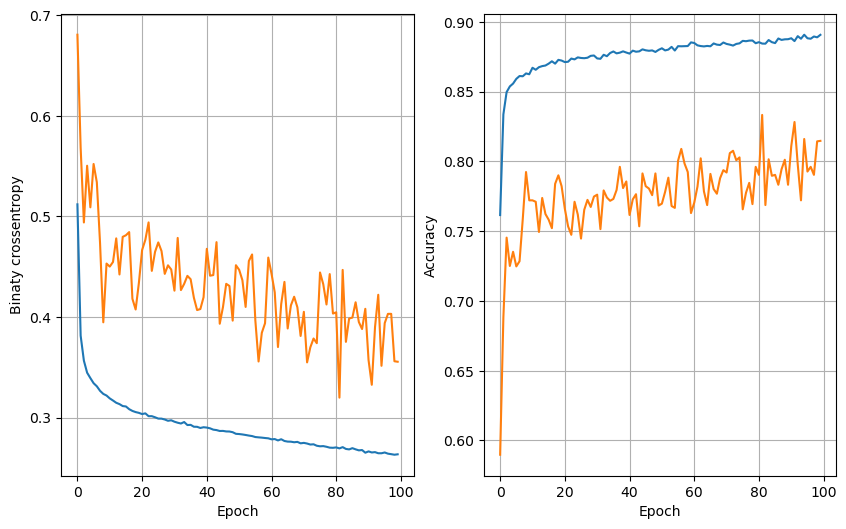

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - accuracy: 0.8584 - loss: 0.3499
16 nodes, dropout 0, lr 0.005, batch size 128


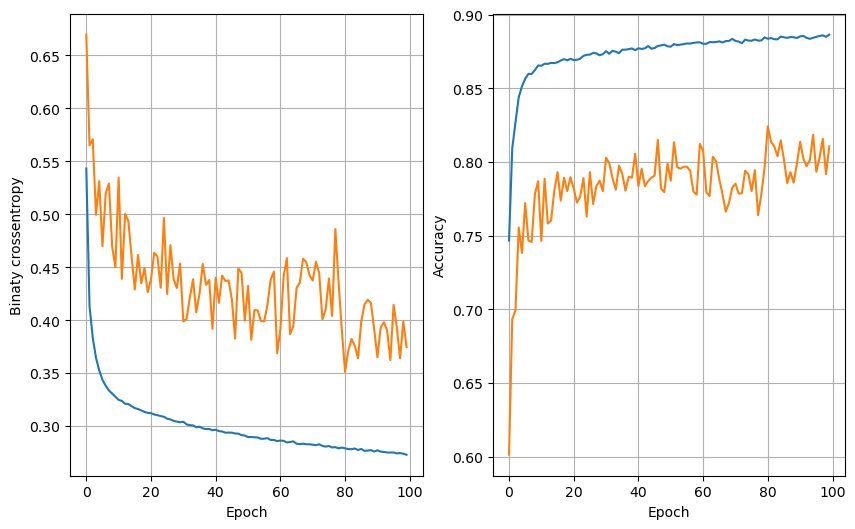

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - accuracy: 0.8587 - loss: 0.3506
16 nodes, dropout 0, lr 0.001, batch size 32


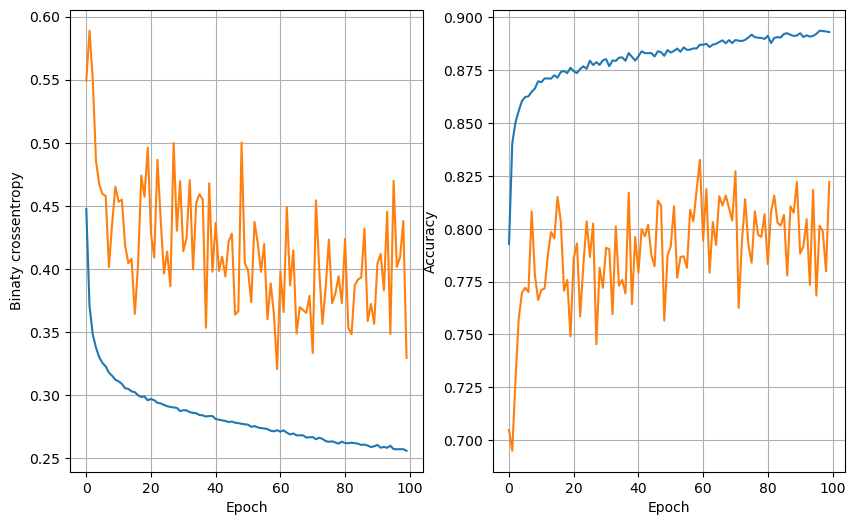

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - accuracy: 0.8576 - loss: 0.3474
16 nodes, dropout 0, lr 0.001, batch size 64


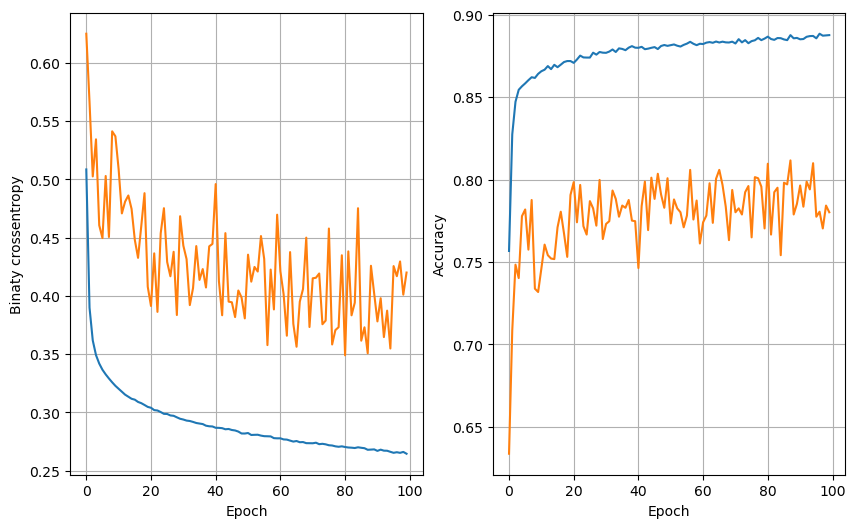

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.8547 - loss: 0.3558
16 nodes, dropout 0, lr 0.001, batch size 128


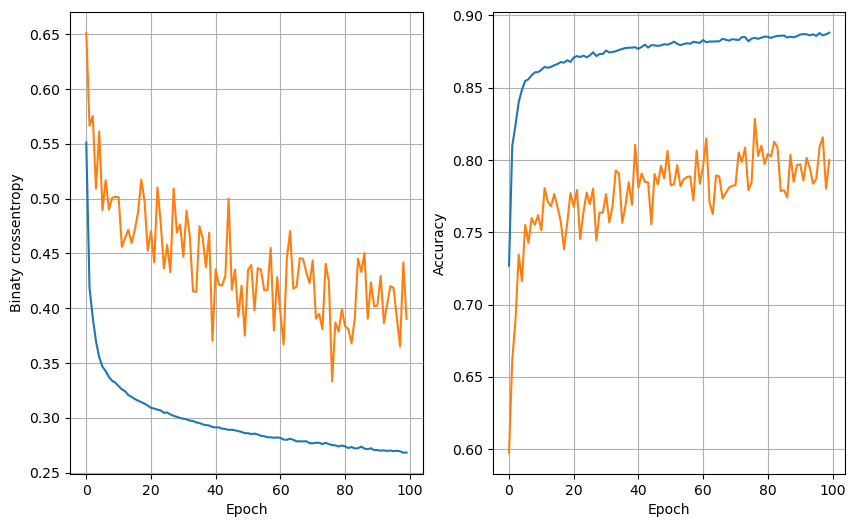

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - accuracy: 0.8552 - loss: 0.3440
16 nodes, dropout 0.2, lr 0.01, batch size 32


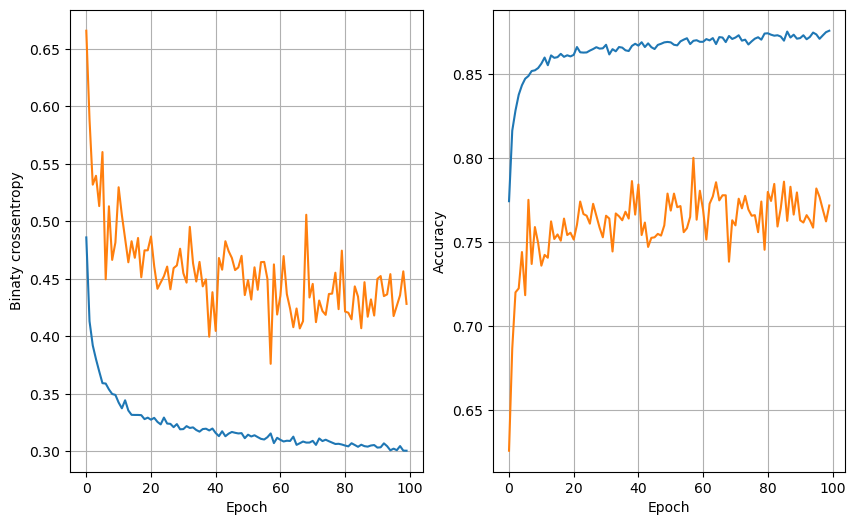

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - accuracy: 0.8608 - loss: 0.3340
16 nodes, dropout 0.2, lr 0.01, batch size 64


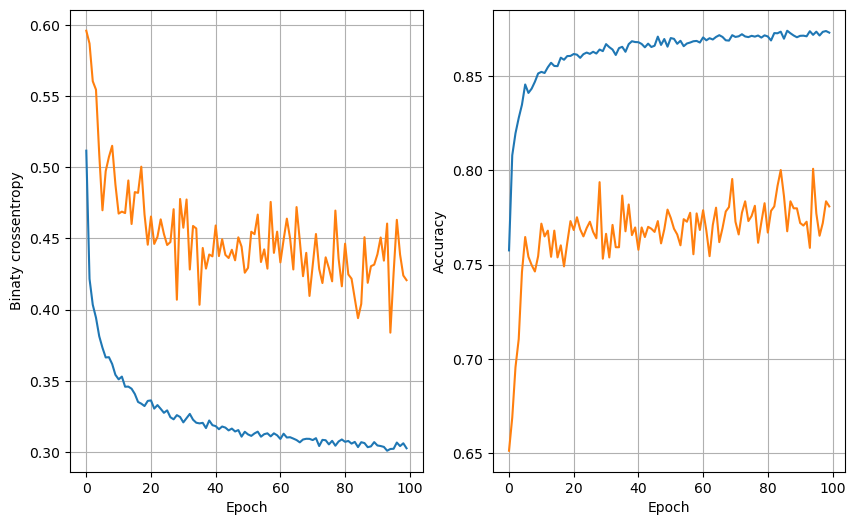

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - accuracy: 0.8615 - loss: 0.3333
16 nodes, dropout 0.2, lr 0.01, batch size 128


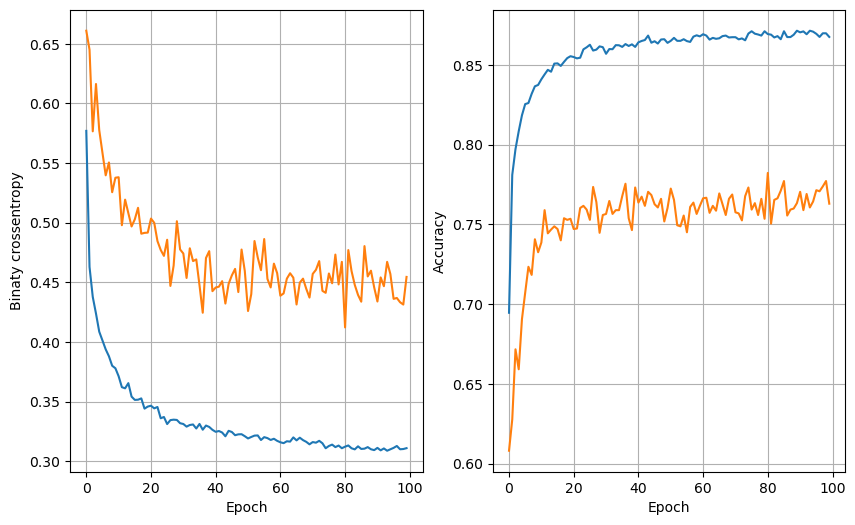

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - accuracy: 0.8627 - loss: 0.3295
16 nodes, dropout 0.2, lr 0.005, batch size 32


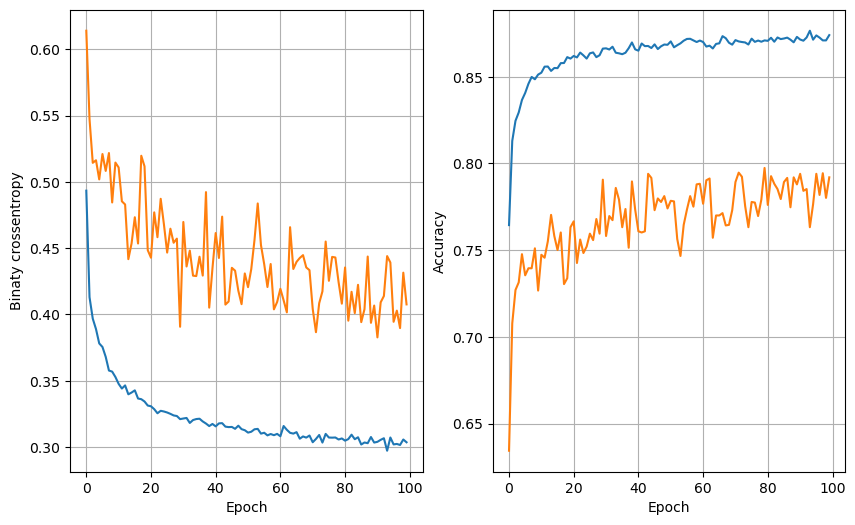

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - accuracy: 0.8588 - loss: 0.3384
16 nodes, dropout 0.2, lr 0.005, batch size 64


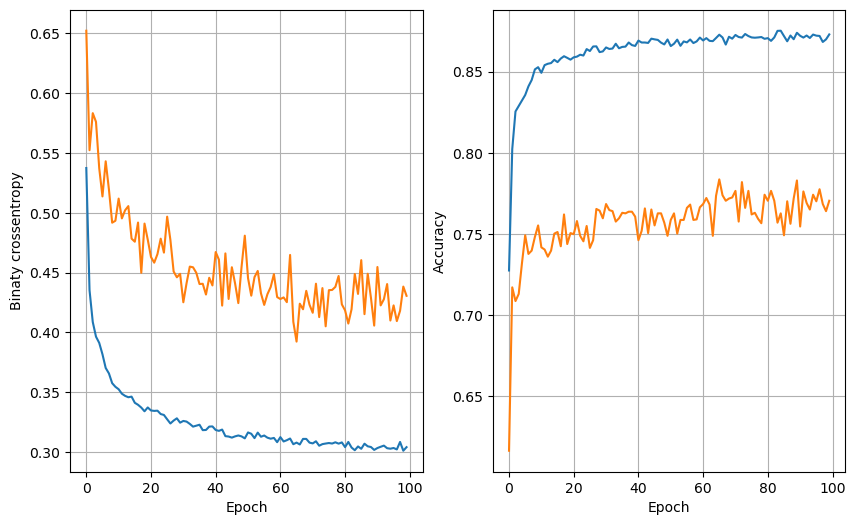

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - accuracy: 0.8645 - loss: 0.3267
16 nodes, dropout 0.2, lr 0.005, batch size 128


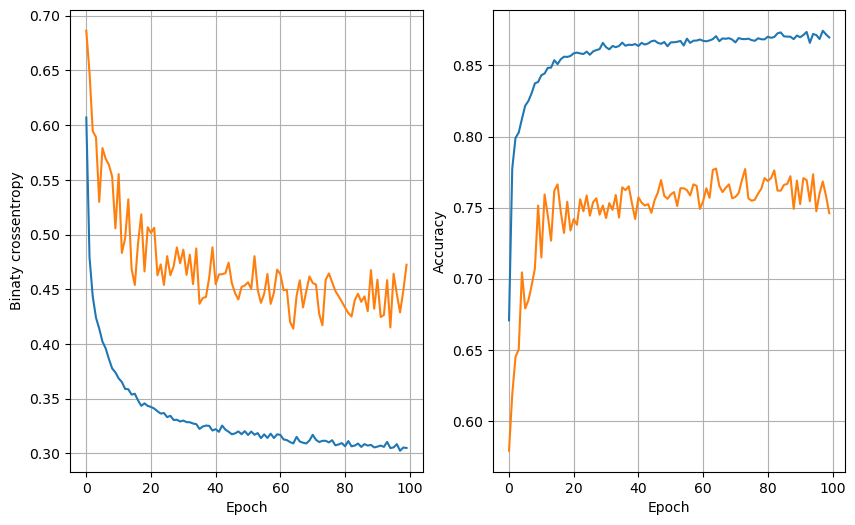

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step - accuracy: 0.8680 - loss: 0.3282
16 nodes, dropout 0.2, lr 0.001, batch size 32


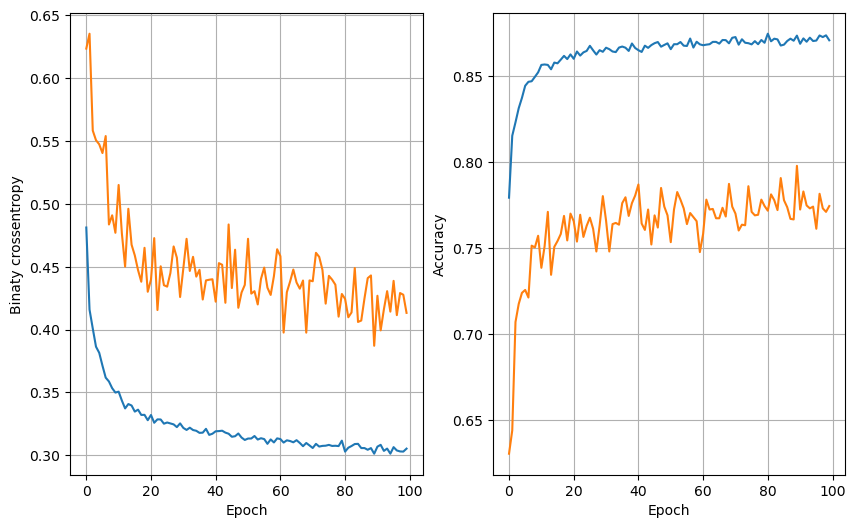

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - accuracy: 0.8569 - loss: 0.3340
16 nodes, dropout 0.2, lr 0.001, batch size 64


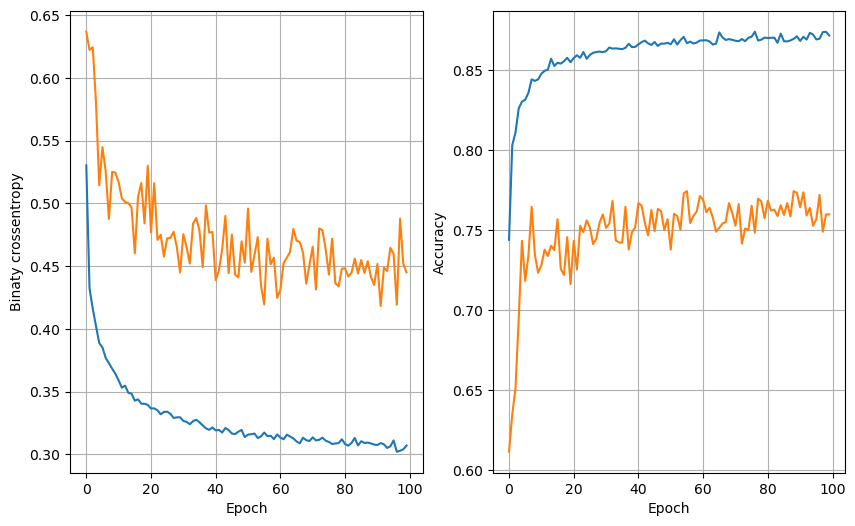

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - accuracy: 0.8576 - loss: 0.3406
16 nodes, dropout 0.2, lr 0.001, batch size 128


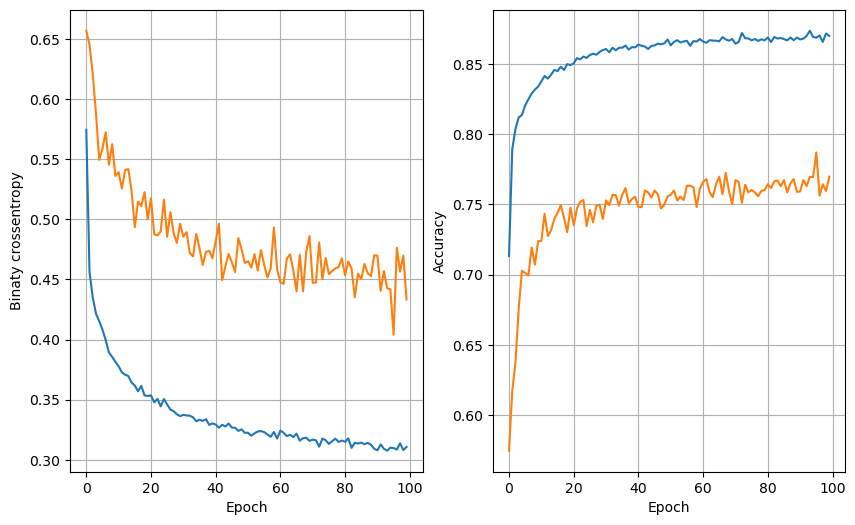

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.8611 - loss: 0.3321
32 nodes, dropout 0, lr 0.01, batch size 32


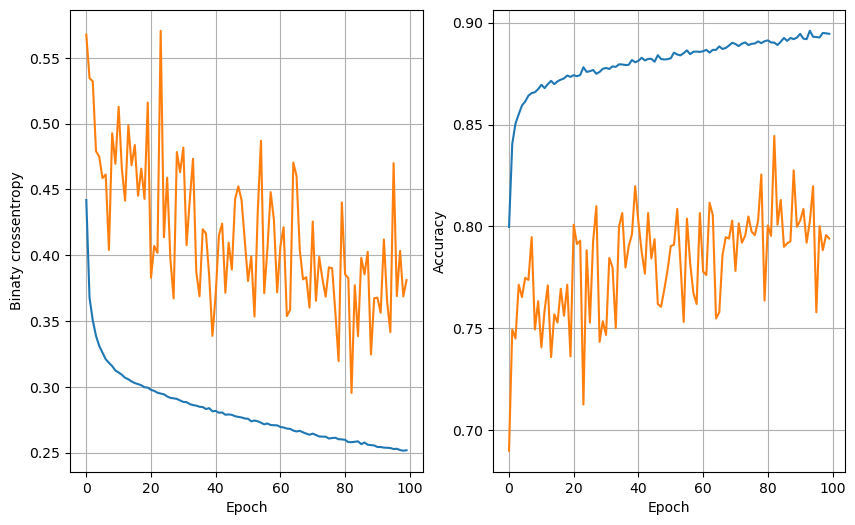

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.8539 - loss: 0.3611
32 nodes, dropout 0, lr 0.01, batch size 64


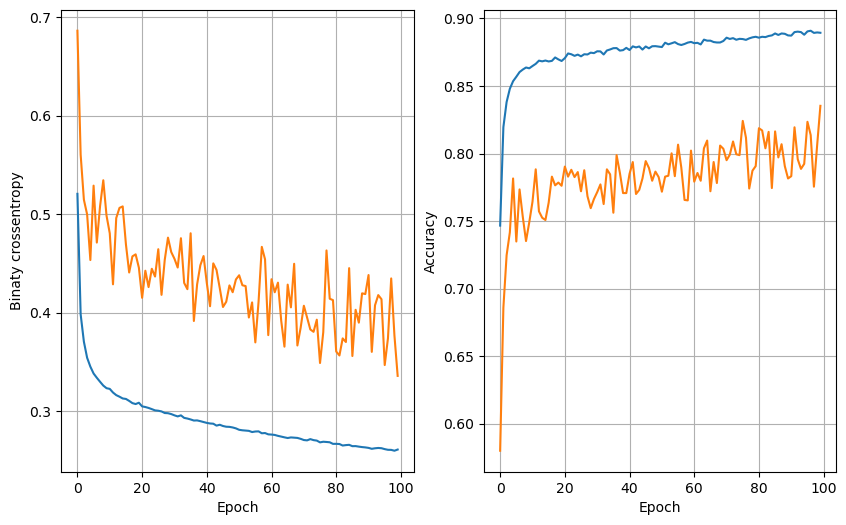

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.8474 - loss: 0.3596
32 nodes, dropout 0, lr 0.01, batch size 128


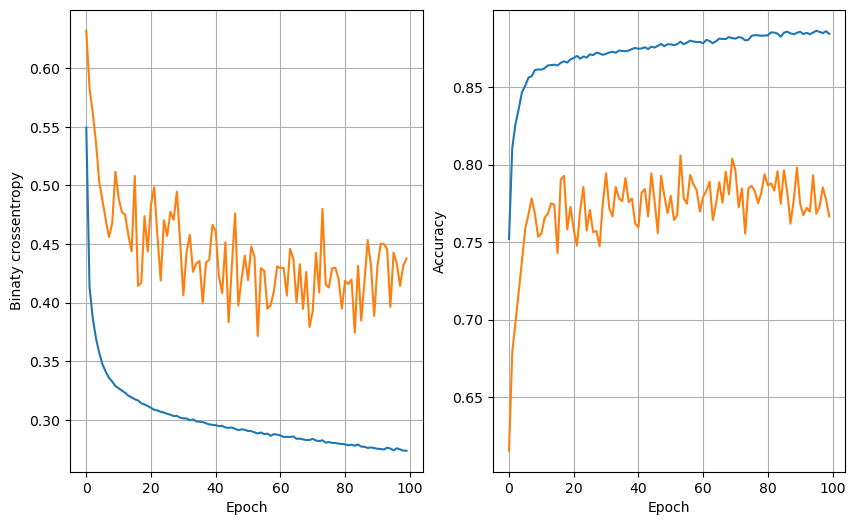

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - accuracy: 0.8592 - loss: 0.3338
32 nodes, dropout 0, lr 0.005, batch size 32


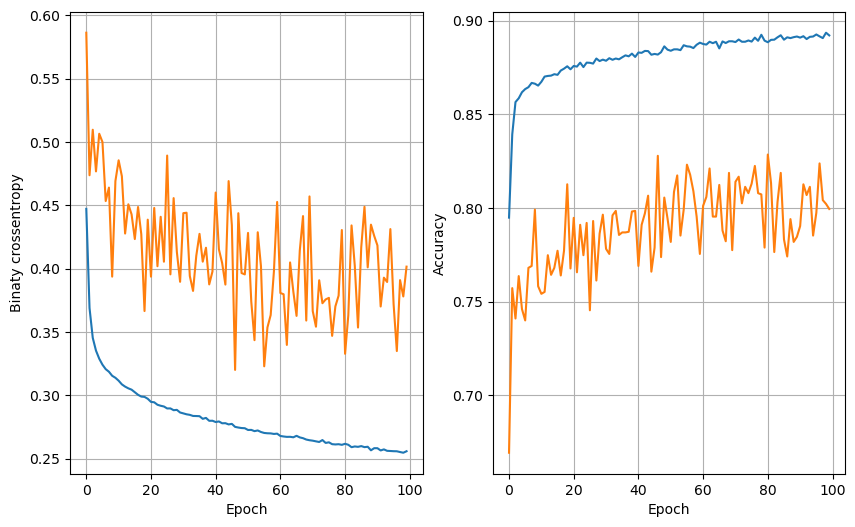

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - accuracy: 0.8520 - loss: 0.3709
32 nodes, dropout 0, lr 0.005, batch size 64


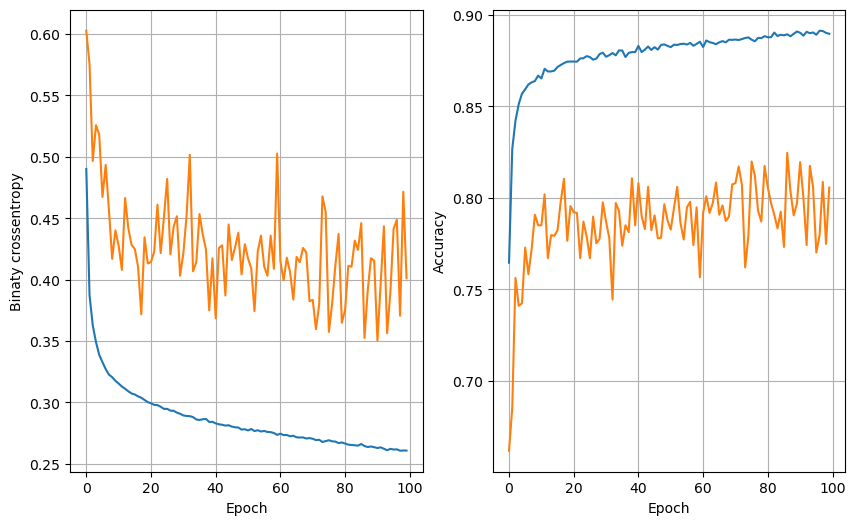

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.8608 - loss: 0.3522
32 nodes, dropout 0, lr 0.005, batch size 128


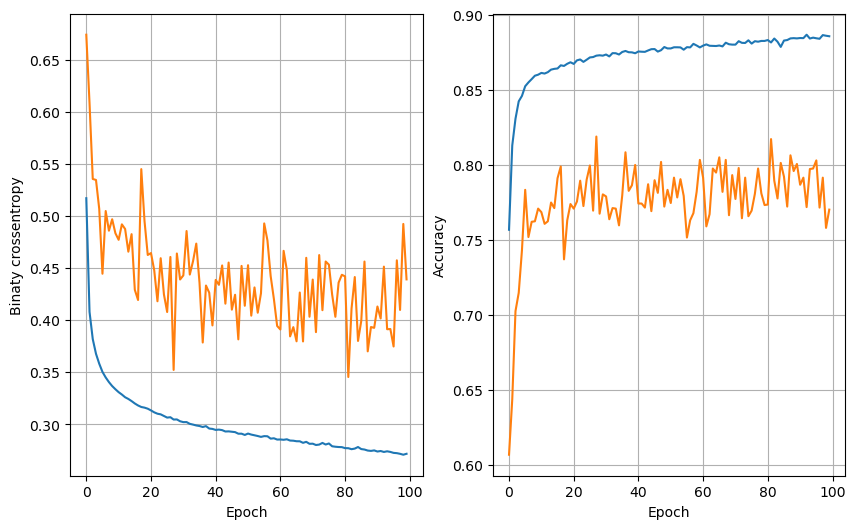

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - accuracy: 0.8495 - loss: 0.3457
32 nodes, dropout 0, lr 0.001, batch size 32


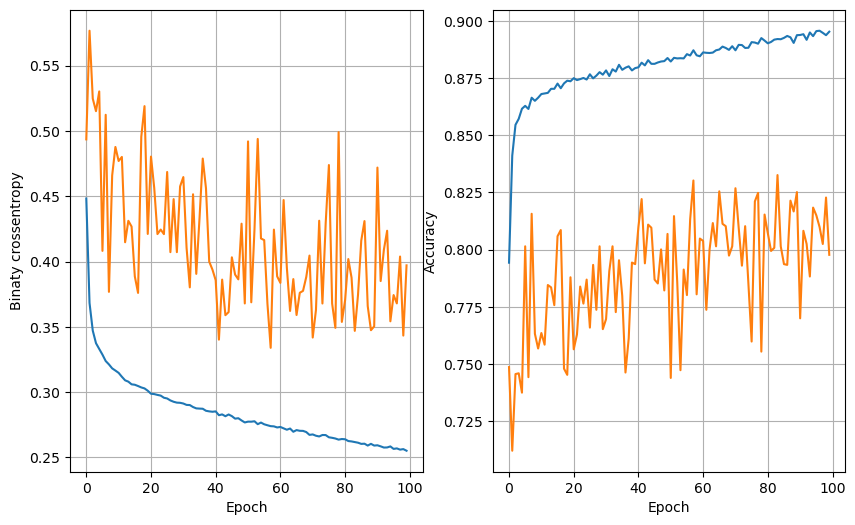

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step - accuracy: 0.8604 - loss: 0.3496
32 nodes, dropout 0, lr 0.001, batch size 64


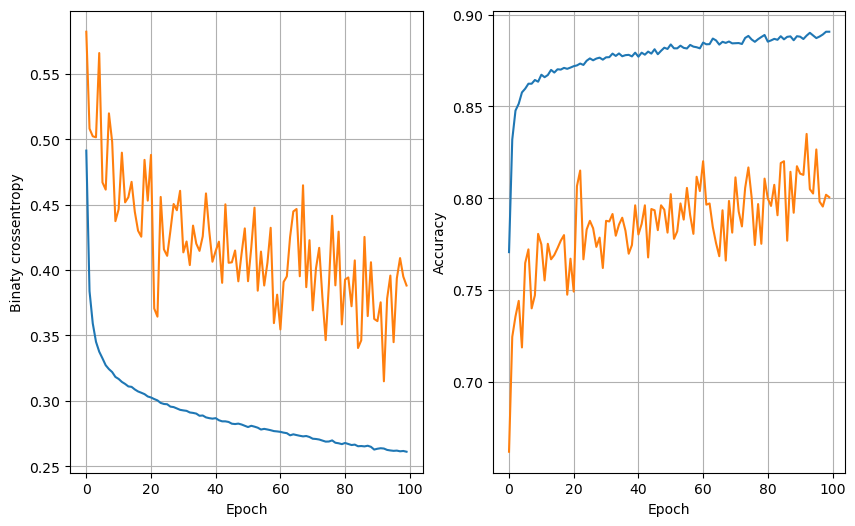

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - accuracy: 0.8503 - loss: 0.3580
32 nodes, dropout 0, lr 0.001, batch size 128


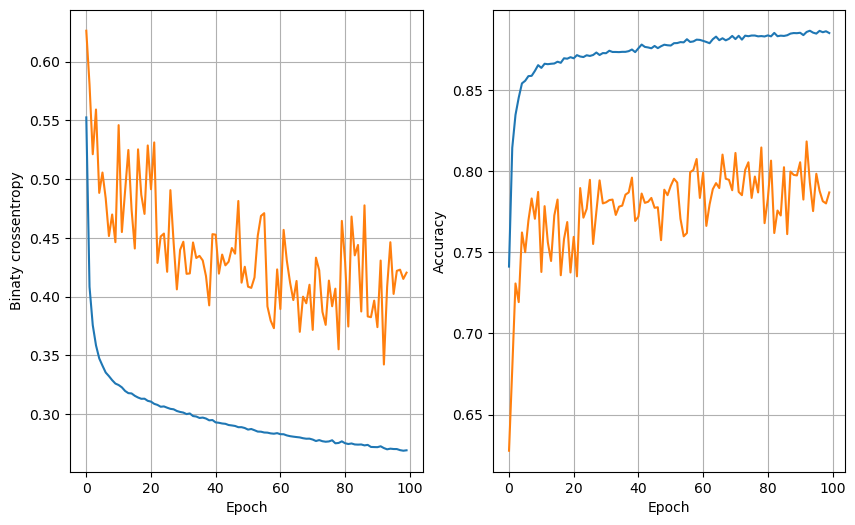

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step - accuracy: 0.8575 - loss: 0.3466
32 nodes, dropout 0.2, lr 0.01, batch size 32


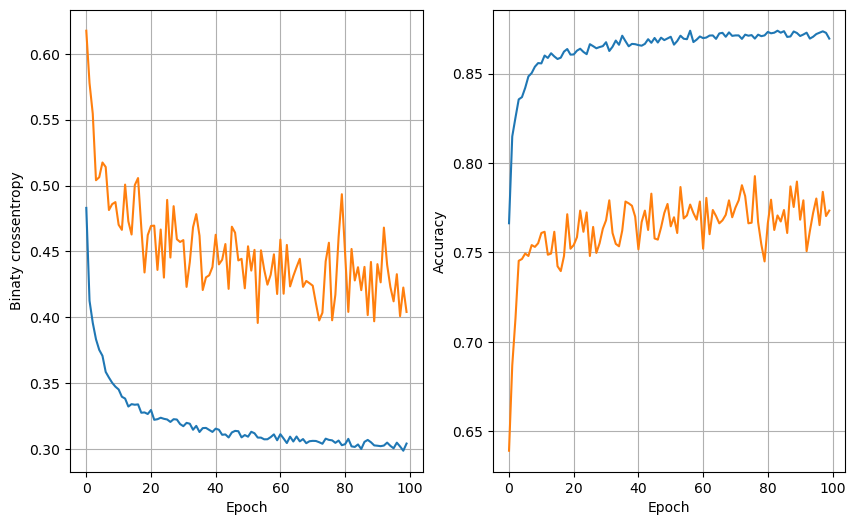

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - accuracy: 0.8537 - loss: 0.3384
32 nodes, dropout 0.2, lr 0.01, batch size 64


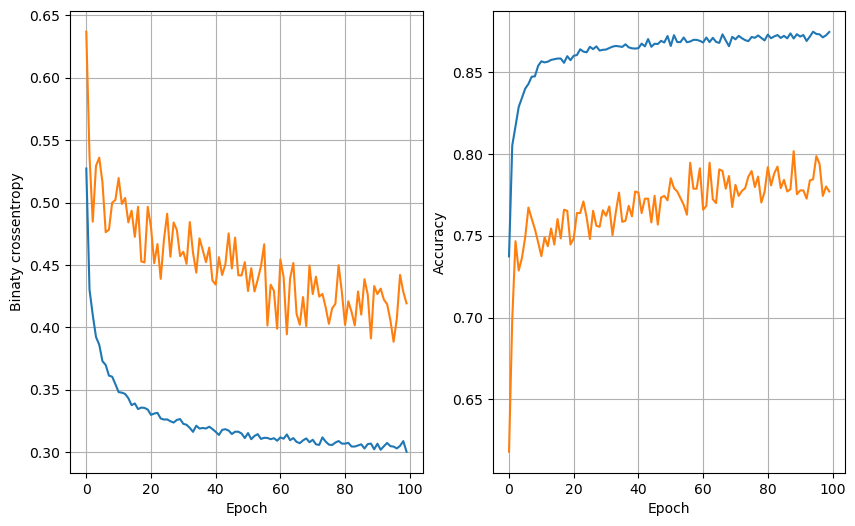

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - accuracy: 0.8607 - loss: 0.3280
32 nodes, dropout 0.2, lr 0.01, batch size 128


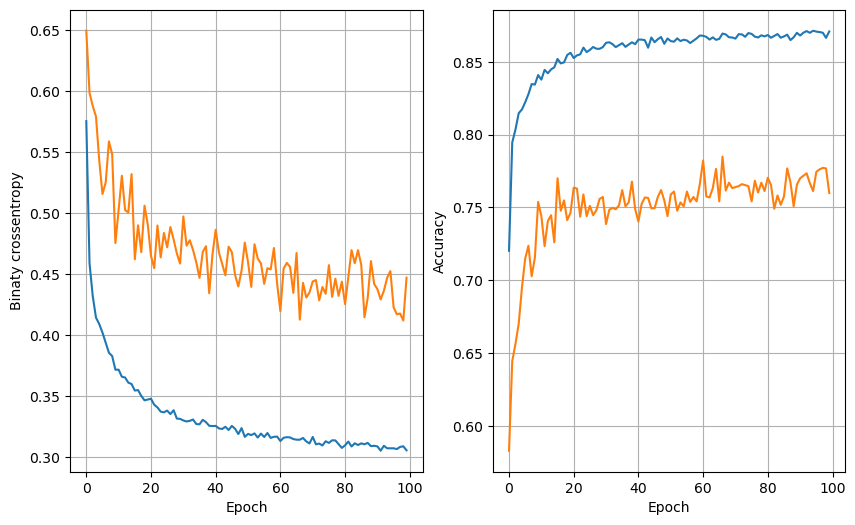

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - accuracy: 0.8543 - loss: 0.3344
32 nodes, dropout 0.2, lr 0.005, batch size 32


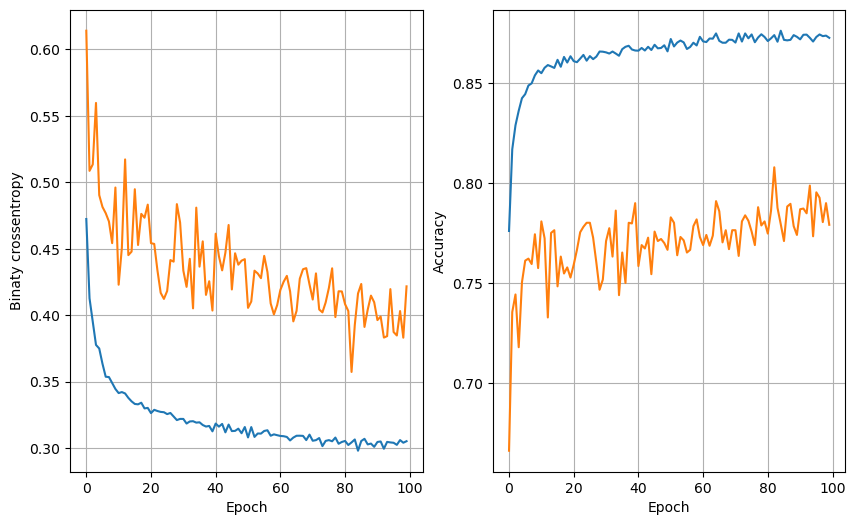

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - accuracy: 0.8587 - loss: 0.3354
32 nodes, dropout 0.2, lr 0.005, batch size 64


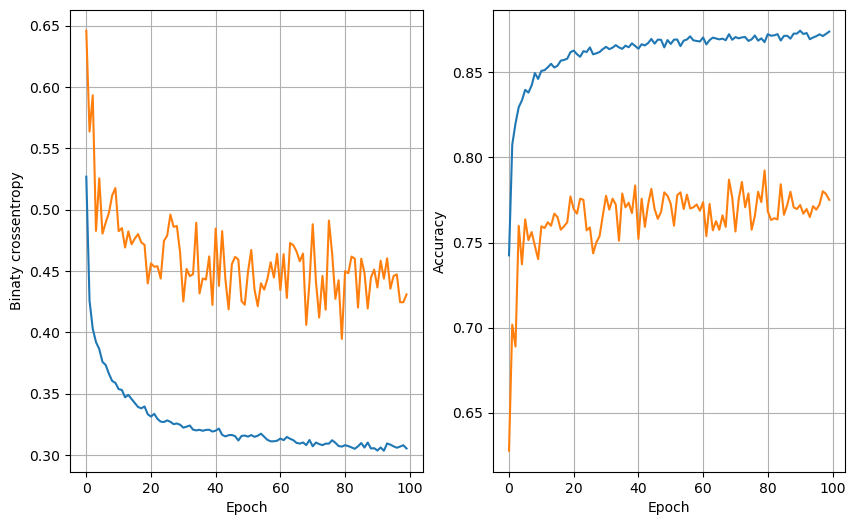

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - accuracy: 0.8653 - loss: 0.3324
32 nodes, dropout 0.2, lr 0.005, batch size 128


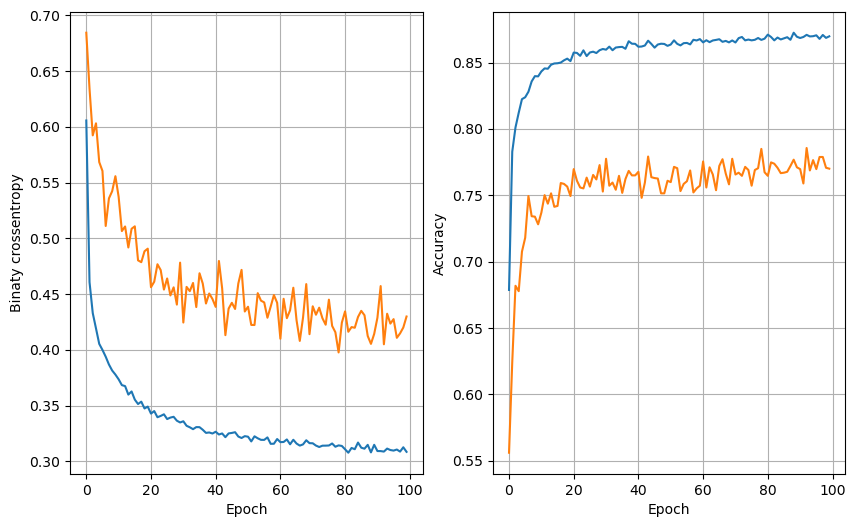

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - accuracy: 0.8634 - loss: 0.3335
32 nodes, dropout 0.2, lr 0.001, batch size 32


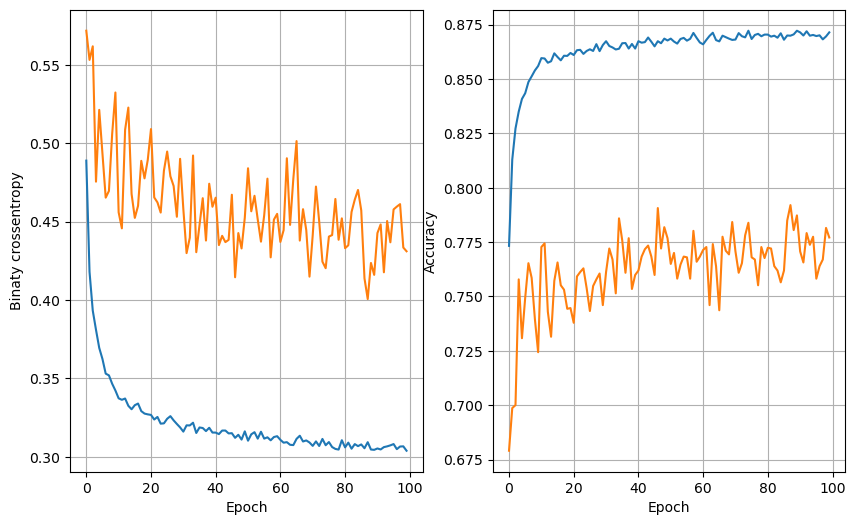

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - accuracy: 0.8630 - loss: 0.3283
32 nodes, dropout 0.2, lr 0.001, batch size 64


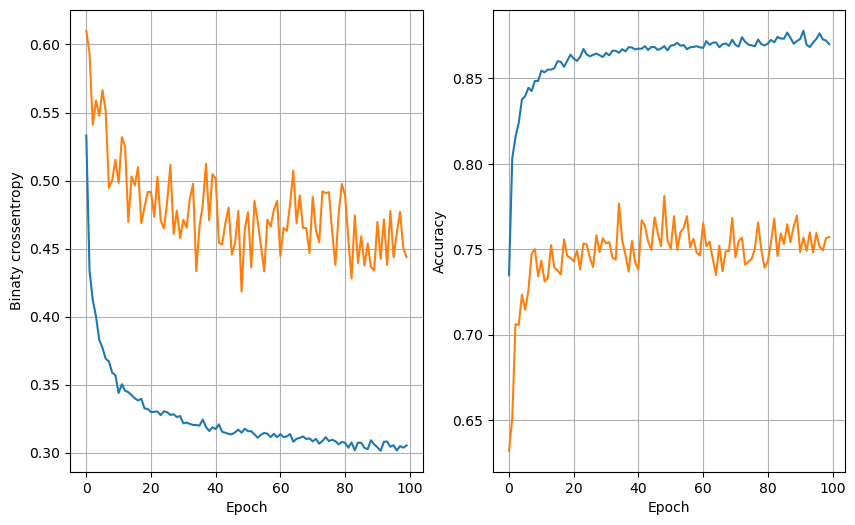

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - accuracy: 0.8634 - loss: 0.3302
32 nodes, dropout 0.2, lr 0.001, batch size 128


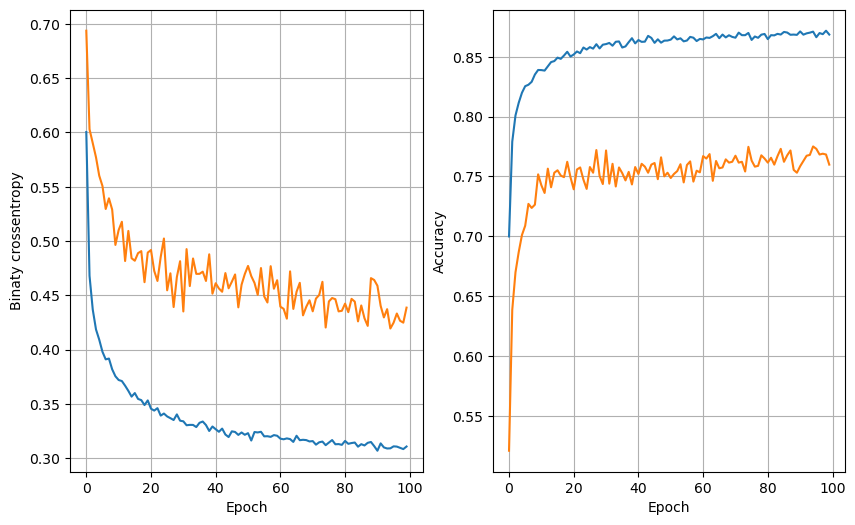

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step - accuracy: 0.8611 - loss: 0.3301
64 nodes, dropout 0, lr 0.01, batch size 32


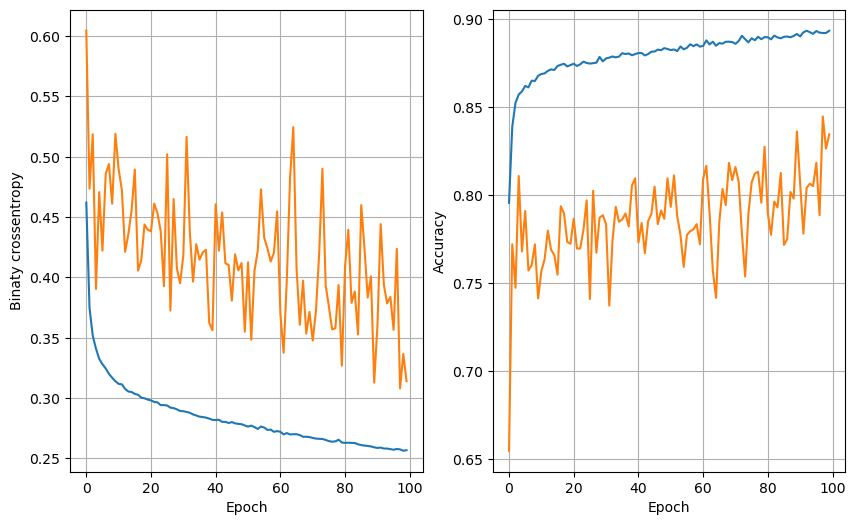

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - accuracy: 0.8517 - loss: 0.3575
64 nodes, dropout 0, lr 0.01, batch size 64


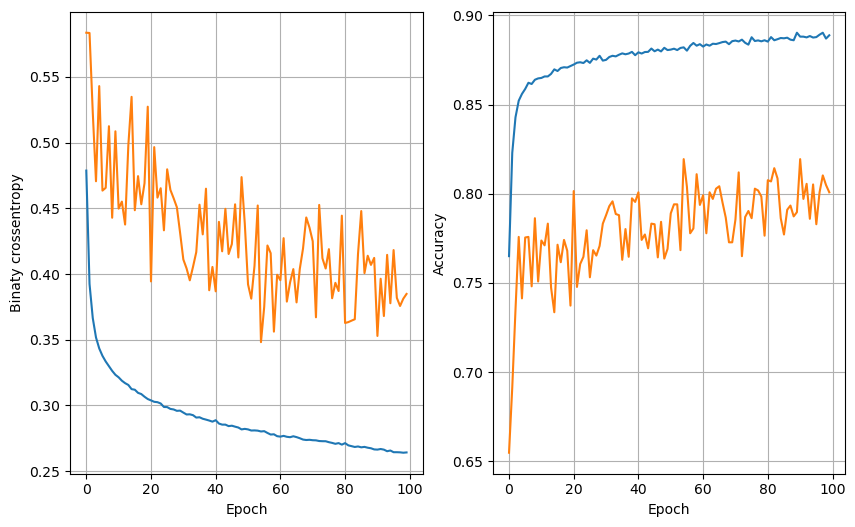

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - accuracy: 0.8538 - loss: 0.3609
64 nodes, dropout 0, lr 0.01, batch size 128


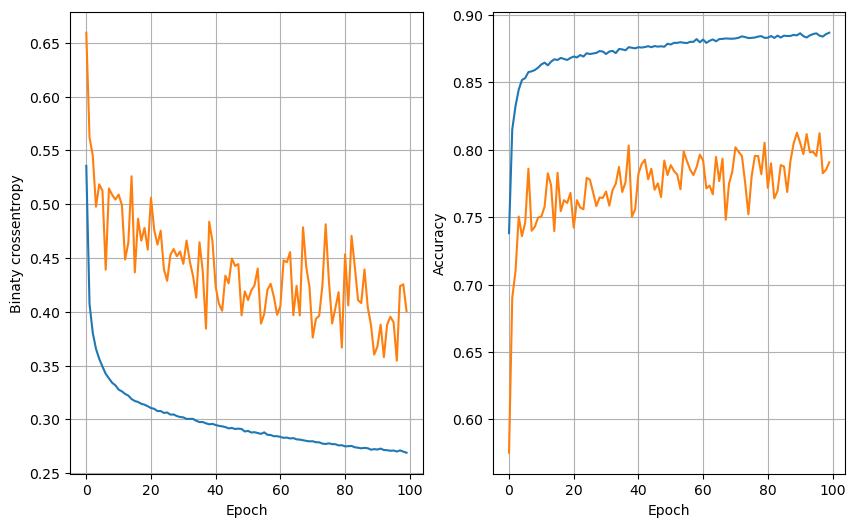

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step - accuracy: 0.8524 - loss: 0.3427
64 nodes, dropout 0, lr 0.005, batch size 32


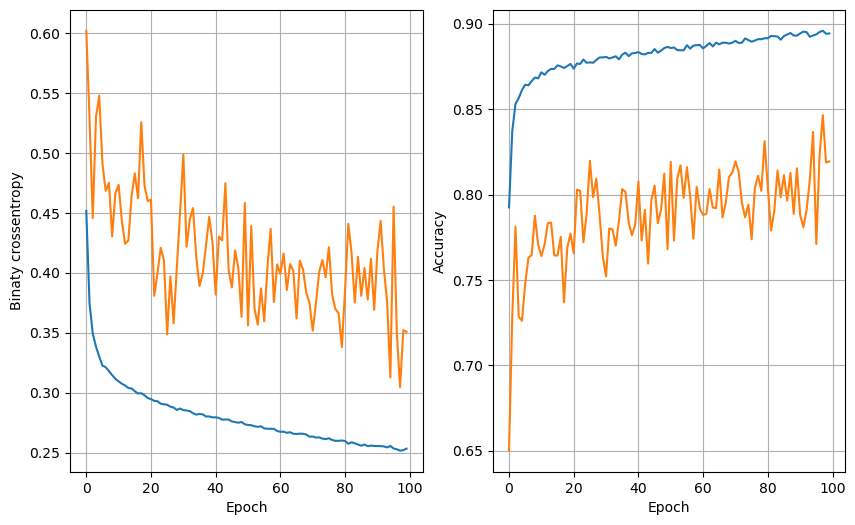

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - accuracy: 0.8512 - loss: 0.3636
64 nodes, dropout 0, lr 0.005, batch size 64


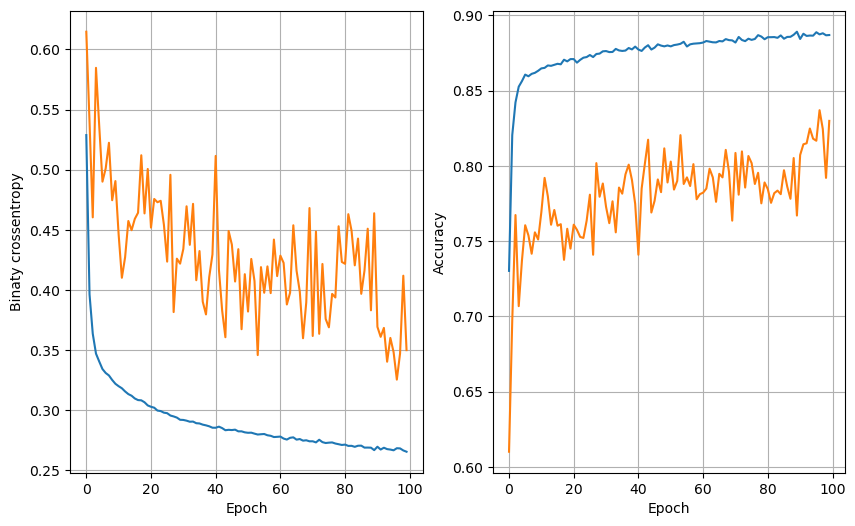

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - accuracy: 0.8559 - loss: 0.3530
64 nodes, dropout 0, lr 0.005, batch size 128


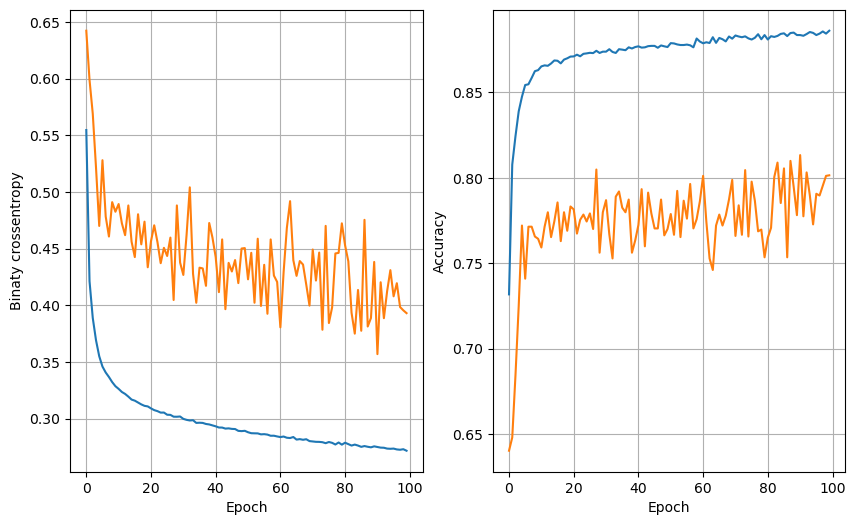

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - accuracy: 0.8534 - loss: 0.3510
64 nodes, dropout 0, lr 0.001, batch size 32


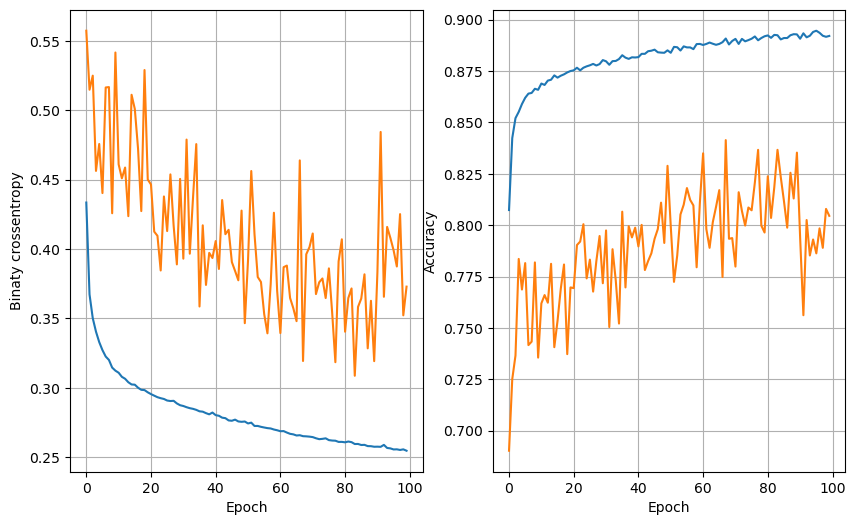

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - accuracy: 0.8580 - loss: 0.3609
64 nodes, dropout 0, lr 0.001, batch size 64


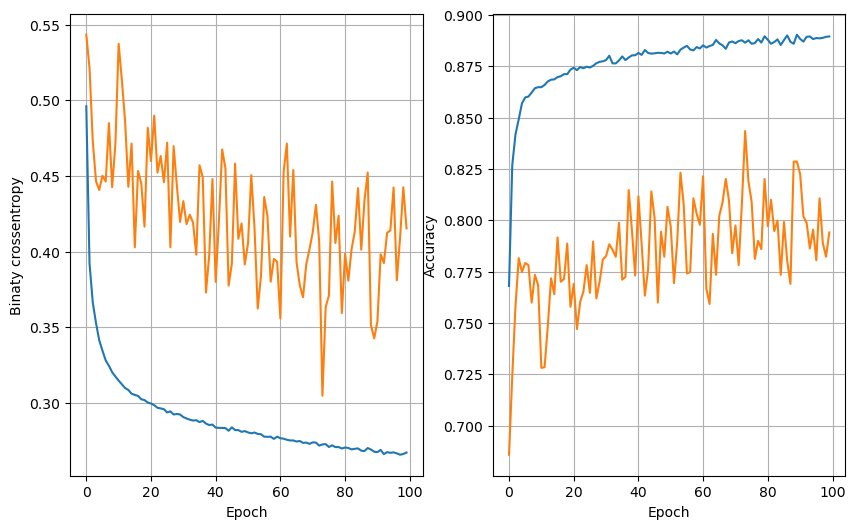

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step - accuracy: 0.8555 - loss: 0.3426
64 nodes, dropout 0, lr 0.001, batch size 128


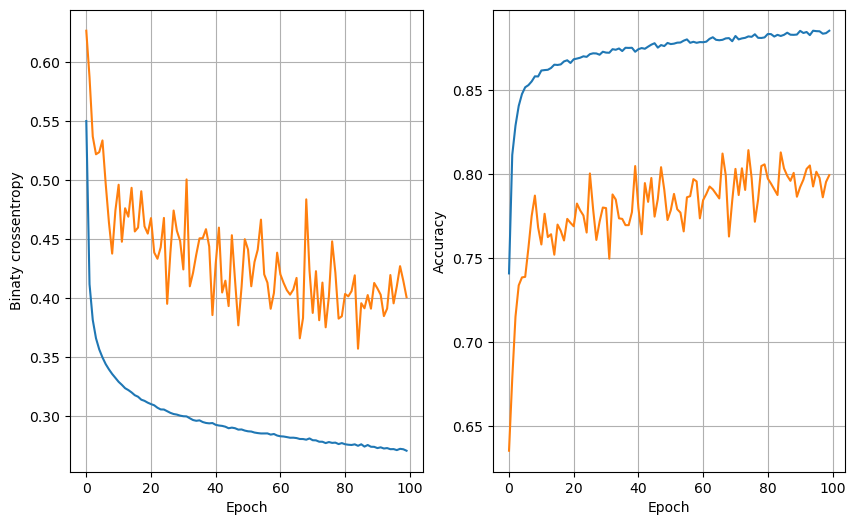

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - accuracy: 0.8548 - loss: 0.3426
64 nodes, dropout 0.2, lr 0.01, batch size 32


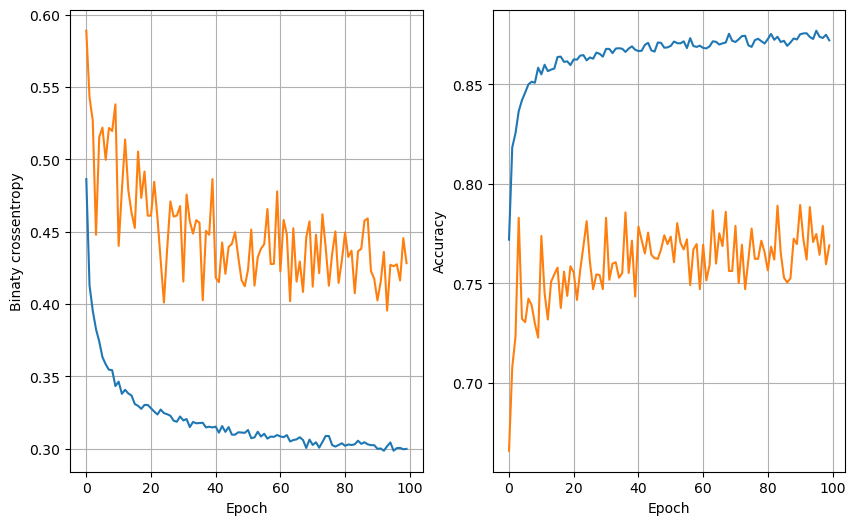

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - accuracy: 0.8630 - loss: 0.3363
64 nodes, dropout 0.2, lr 0.01, batch size 64


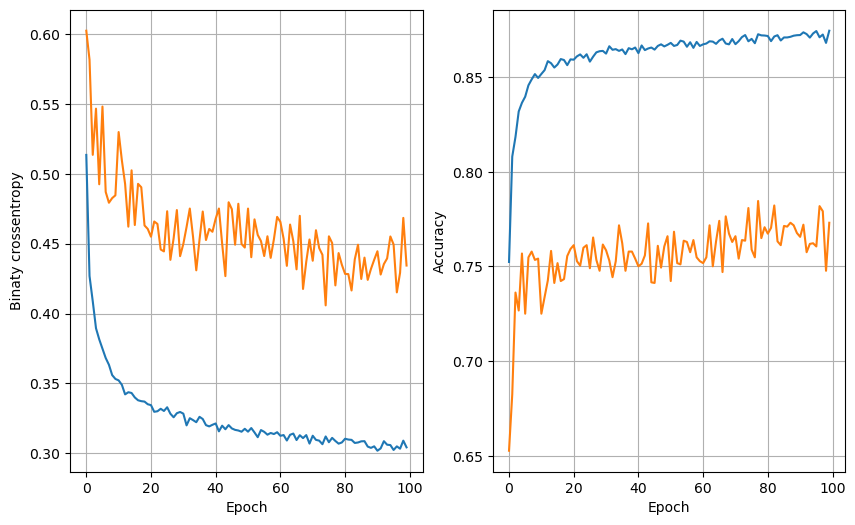

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - accuracy: 0.8591 - loss: 0.3336
64 nodes, dropout 0.2, lr 0.01, batch size 128


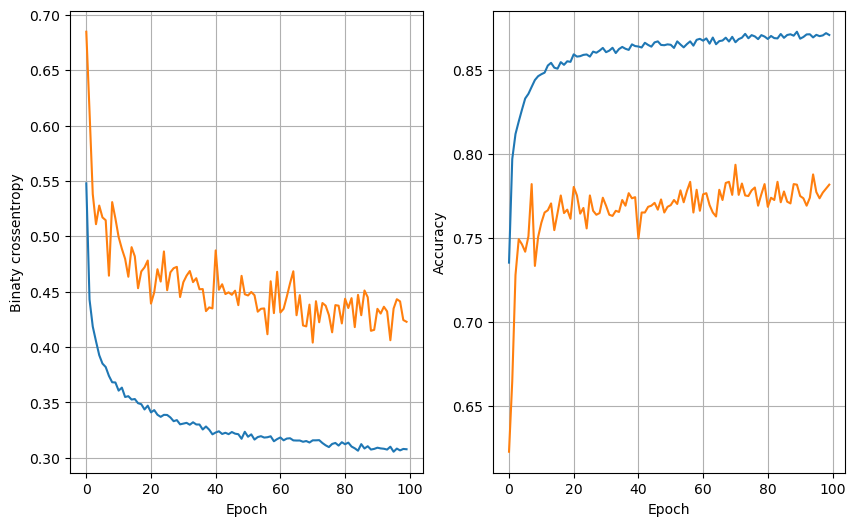

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - accuracy: 0.8574 - loss: 0.3378
64 nodes, dropout 0.2, lr 0.005, batch size 32


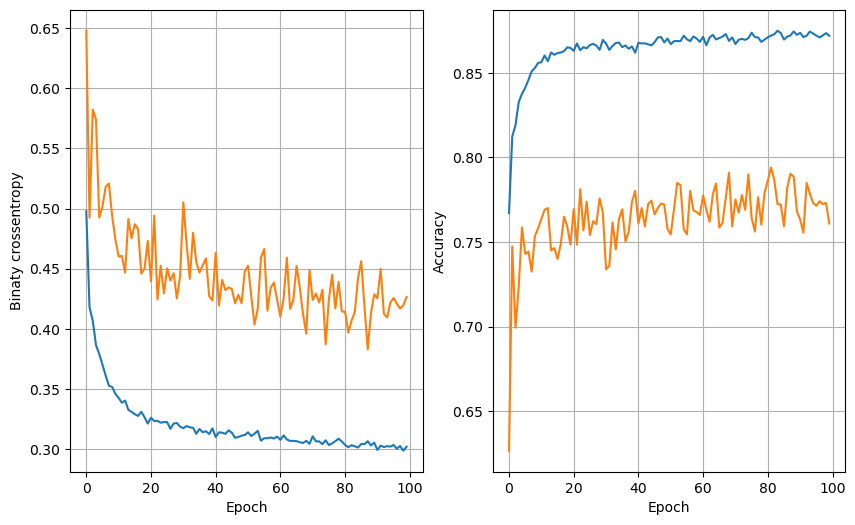

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - accuracy: 0.8593 - loss: 0.3316
64 nodes, dropout 0.2, lr 0.005, batch size 64


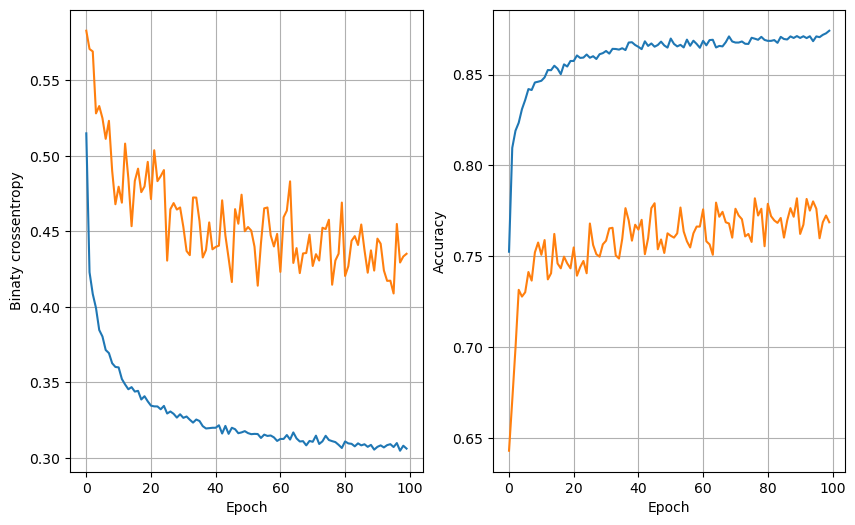

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step - accuracy: 0.8623 - loss: 0.3346
64 nodes, dropout 0.2, lr 0.005, batch size 128


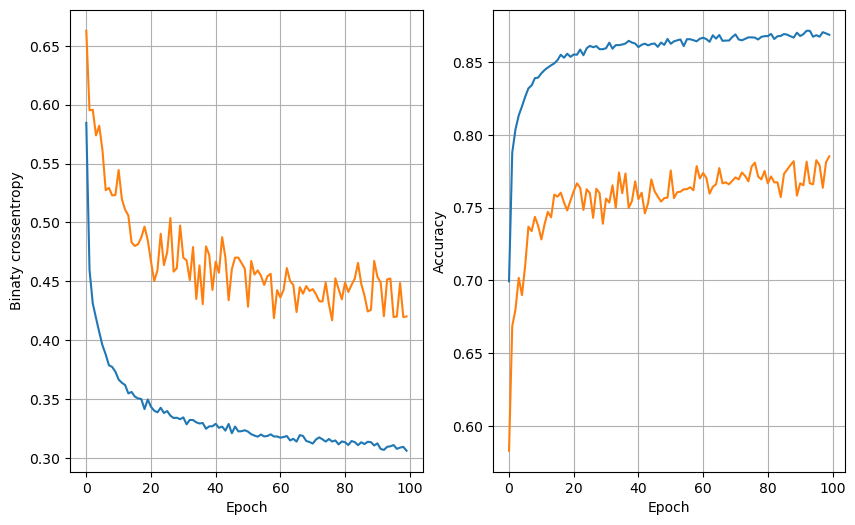

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - accuracy: 0.8563 - loss: 0.3348
64 nodes, dropout 0.2, lr 0.001, batch size 32


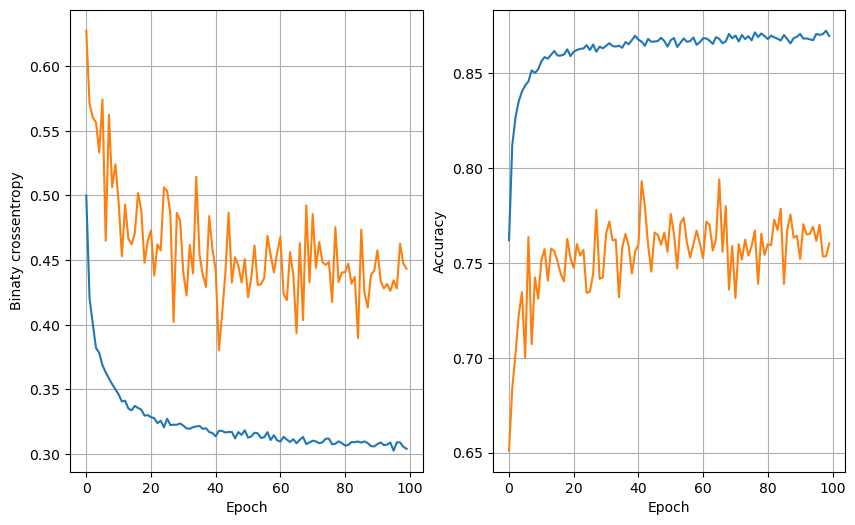

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - accuracy: 0.8611 - loss: 0.3357
64 nodes, dropout 0.2, lr 0.001, batch size 64


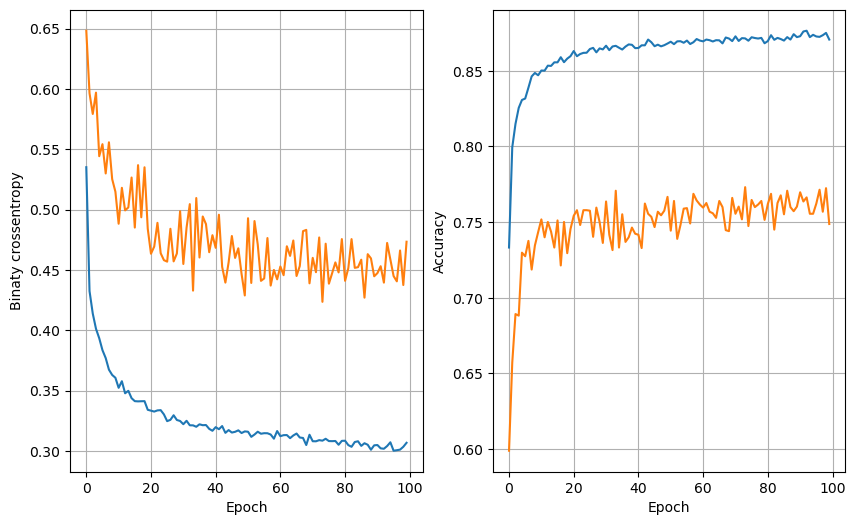

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - accuracy: 0.8697 - loss: 0.3252
64 nodes, dropout 0.2, lr 0.001, batch size 128


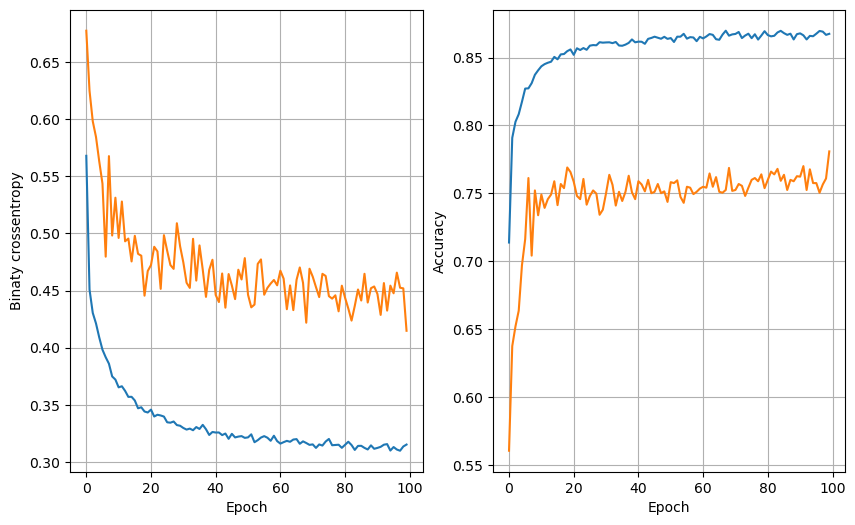

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - accuracy: 0.8567 - loss: 0.3342


In [50]:
least_val_loss = float('inf')
least_val_loss= None
epochs= 100
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]: 
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
                model, history= train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(x_valid, y_valid)
                if val_loss is not None and least_val_loss is not None and val_loss < least_val_loss:
                #if val_loss < least_val_loss:
                    least_val_loss= val_loss
                    least_val_loss_model